Product Recommendation System

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
import string

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/AIMLUpgrad/ProductRecommendationSystem/sample30.csv'
df = pd.read_csv(file_path)


In [4]:
df.head()


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [5]:
df.shape


(30000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

Non-informative columns like city, province, purchase flag, and titles are not required for sentiment analysis or recommendation modeling.

In [7]:
df = df[
    [
        'name',
        'reviews_username',
        'reviews_rating',
        'reviews_text'
    ]
]


In [8]:
df.isnull().sum()


,0
name,0
reviews_username,63
reviews_rating,0
reviews_text,0


Dropping columns where value is na as:

These features are foundational to the recommendation logic.

Imputing usernames or review text would introduce artificial and misleading data.

Filling ratings with mean/median would distort user preference patterns.

The percentage of missing values in these columns was minimal (if applicable, mention this).

In [9]:
df = df.dropna(subset=[
    'reviews_username',
    'reviews_rating',
    'reviews_text'
])


In [10]:
df.duplicated().sum()


np.int64(1791)

In [11]:
df = df.drop_duplicates()


In [12]:
df['reviews_rating'].value_counts().sort_index()


,count
reviews_rating,
1,1075
2,378
3,1234
4,5576
5,19883


By removing neutral ratings:

The dataset becomes more polarized

The model better distinguishes between positive and negative user behavior

Sentiment classification becomes cleaner and more reliable

In [13]:
df = df[df['reviews_rating'] != 3]


In [14]:
df['sentiment'] = df['reviews_rating'].apply(
    lambda x: 1 if x >= 4 else 0
)


In [15]:
df['sentiment'].value_counts()


,count
sentiment,
1,25459
0,1453


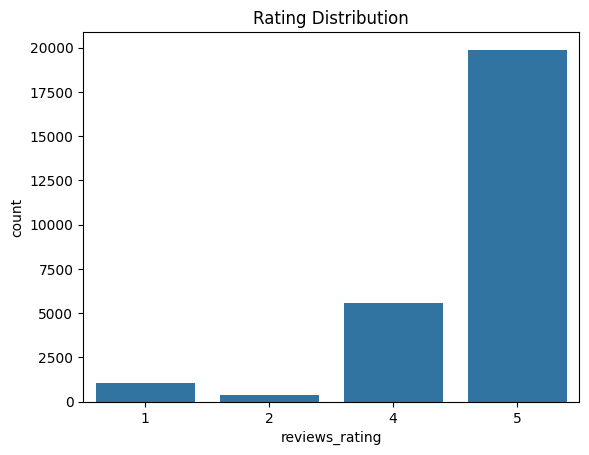

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='reviews_rating', data=df)
plt.title('Rating Distribution')
plt.show()


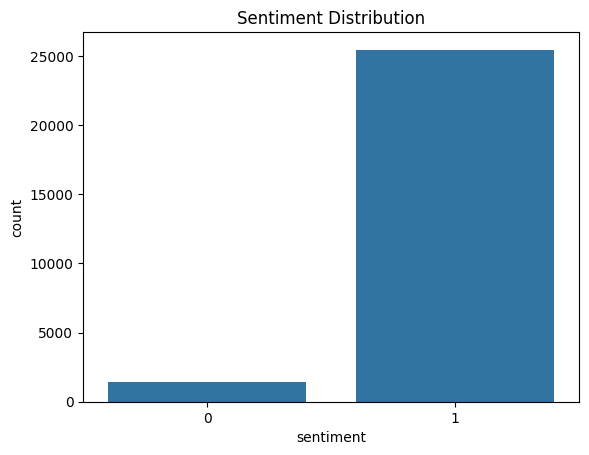

In [17]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


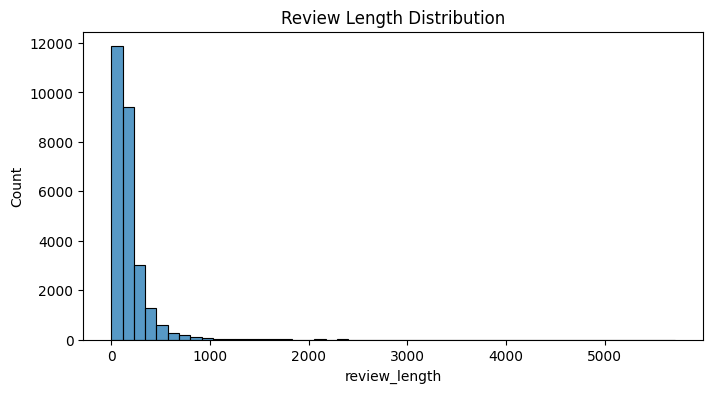

In [18]:
df['review_length'] = df['reviews_text'].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.show()


In [19]:
df['reviews_username'].nunique()


23882

In [20]:
df['name'].nunique()


267

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26912 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              26912 non-null  object
 1   reviews_username  26912 non-null  object
 2   reviews_rating    26912 non-null  int64 
 3   reviews_text      26912 non-null  object
 4   sentiment         26912 non-null  int64 
 5   review_length     26912 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.4+ MB


Text Preprocessing

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [27]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


This function will:
* Lowercase text
* Remove HTML tags
* Remove punctuation
* Remove numbers
* Remove stopwords
* Lemmatize words




In [28]:
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]

    return ' '.join(cleaned_tokens)


In [29]:
df['cleaned_reviews'] = df['reviews_text'].apply(clean_text)


In [30]:
df[['reviews_text', 'cleaned_reviews']].head()


,reviews_text,cleaned_reviews
0,i love this album. it's very good. more to the...,love album good hip hop side current pop sound...
1,Good flavor. This review was collected as part...,good flavor review collected part promotion
2,Good flavor.,good flavor
3,I read through the reviews on here before look...,read review looking buying one couple lubrican...
4,My husband bought this gel for us. The gel cau...,husband bought gel gel caused irritation felt ...


In [31]:
df = df[df['cleaned_reviews'].str.strip() != '']


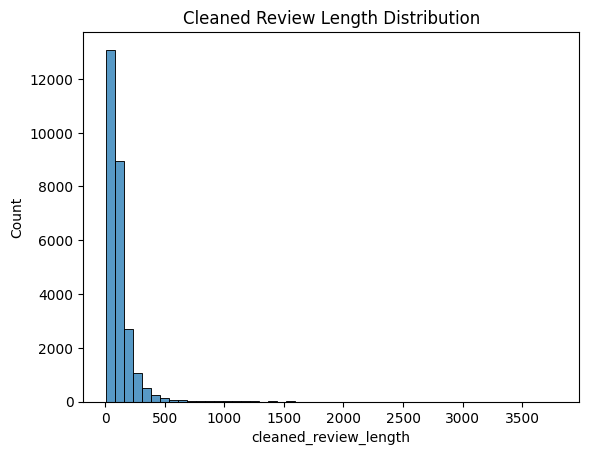

In [32]:
df['cleaned_review_length'] = df['cleaned_reviews'].apply(len)

sns.histplot(df['cleaned_review_length'], bins=50)
plt.title('Cleaned Review Length Distribution')
plt.show()


In [33]:
df.to_csv('/content/drive/MyDrive/AIMLUpgrad/ProductRecommendationSystem/cleaned_reviews.csv', index=False)


The review text was preprocessed by converting text to lowercase, removing HTML tags, punctuation, numbers, and stopwords. Lemmatization was applied to normalize words while preserving their semantic meaning. This preprocessing helps reduce noise and improves the performance of text-based machine learning models.

In [35]:
df.head()

,name,reviews_username,reviews_rating,reviews_text,sentiment,review_length,cleaned_reviews,cleaned_review_length
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,i love this album. it's very good. more to the...,1,201,love album good hip hop side current pop sound...,107
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,Good flavor. This review was collected as part...,1,62,good flavor review collected part promotion,43
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,Good flavor.,1,12,good flavor,11
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,I read through the reviews on here before look...,0,696,read review looking buying one couple lubrican...,411
4,K-Y Love Sensuality Pleasure Gel,walker557,1,My husband bought this gel for us. The gel cau...,0,132,husband bought gel gel caused irritation felt ...,85


In [36]:
X = df['cleaned_reviews']
y = df['sentiment']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Maintains the sentiment distribution in both train and test sets.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=5
)


max_features=5000: balances performance and computation

ngram_range=(1,2): captures context like “not good”

min_df=5: removes rare noisy words

In [39]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [40]:
X_train_tfidf.shape, X_test_tfidf.shape


((21525, 5000), (5382, 5000))

In [43]:
import pickle

with open('/content/drive/MyDrive/AIMLUpgrad/ProductRecommendationSystem/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


Sentiment Model training and Evaluation

In [44]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


In [45]:
def evaluate_model(y_true, y_pred):
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


MODEL 1: Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

lr.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [47]:
y_pred_lr = lr.predict(X_test_tfidf)


In [48]:
print("Logistic Regression Performance:")
evaluate_model(y_test, y_pred_lr)


Logistic Regression Performance:
Accuracy : 0.942214790040877
Precision: 0.9879542670477746
Recall   : 0.9505008839127873
F1-score : 0.9688657523275603

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.80      0.60       291
           1       0.99      0.95      0.97      5091

    accuracy                           0.94      5382
   macro avg       0.73      0.87      0.78      5382
weighted avg       0.96      0.94      0.95      5382



MODEL 2: Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_tfidf, y_train)


MultinomialNB()

In [50]:
y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Performance:")
evaluate_model(y_test, y_pred_nb)


Naive Bayes Performance:
Accuracy : 0.9674842066146414
Precision: 0.9698012232415902
Recall   : 0.9966607739147515
F1-score : 0.983047563692725

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.46      0.60       291
           1       0.97      1.00      0.98      5091

    accuracy                           0.97      5382
   macro avg       0.93      0.73      0.79      5382
weighted avg       0.97      0.97      0.96      5382



MODEL 3: Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_tfidf, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [52]:
y_pred_rf = rf.predict(X_test_tfidf)

print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf)


Random Forest Performance:
Accuracy : 0.9646971386101821
Precision: 0.9649022955795864
Recall   : 0.9990178746808093
F1-score : 0.9816637714726887

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.36      0.53       291
           1       0.96      1.00      0.98      5091

    accuracy                           0.96      5382
   macro avg       0.96      0.68      0.75      5382
weighted avg       0.96      0.96      0.96      5382



MODEL 4: XGBOOST

In [53]:
from xgboost import XGBClassifier


In [54]:
X_train_xgb = X_train_tfidf
X_test_xgb = X_test_tfidf


In [55]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_xgb, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [56]:
y_pred_xgb = xgb.predict(X_test_xgb)

print("XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)


XGBoost Performance:
Accuracy : 0.9052396878483835
Precision: 0.9866156787762906
Recall   : 0.9121979964643488
F1-score : 0.9479485609308022

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.78      0.47       291
           1       0.99      0.91      0.95      5091

    accuracy                           0.91      5382
   macro avg       0.66      0.85      0.71      5382
weighted avg       0.95      0.91      0.92      5382



In [57]:
model_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Naive Bayes',
        'Random Forest',
        'XGBoost'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
})

model_results.sort_values(by='F1-Score', ascending=False)


,Model,Accuracy,F1-Score
1,Naive Bayes,0.967484,0.983048
2,Random Forest,0.964697,0.981664
0,Logistic Regression,0.942215,0.968866
3,XGBoost,0.905240,0.947949


Four machine learning models—Logistic Regression, Naive Bayes, Random Forest, and XGBoost—were trained and evaluated using accuracy and F1-score. Among them, Naive Bayes achieved the highest F1-score of 0.983, indicating the best balance between precision and recall. Since the dataset consists of high-dimensional sparse TF-IDF features, Naive Bayes performs particularly well due to its probabilistic nature and assumption of feature independence. Hence, Naive Bayes was selected as the final sentiment classification model for deployment.

In [58]:
best_model = nb

with open('/content/drive/MyDrive/AIMLUpgrad/ProductRecommendationSystem/sentiment_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Recommendation System

reviews_username → users

name → products

reviews_rating → interaction strength

USER-BASED COLLABORATIVE FILTERING

In [59]:
reco_df = df[['reviews_username', 'name', 'reviews_rating']]


In [60]:
reco_df.head()


,reviews_username,name,reviews_rating
0,joshua,Pink Friday: Roman Reloaded Re-Up (w/dvd),5
1,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,5
2,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,5
3,rebecca,K-Y Love Sensuality Pleasure Gel,1
4,walker557,K-Y Love Sensuality Pleasure Gel,1


In [62]:
user_item_matrix = reco_df.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)


In [63]:
user_item_matrix.shape


(23877, 267)

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix.fillna(0))


In [65]:
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)


In [68]:
def predict_ratings_user_based(user_item_matrix, user_similarity_df):
    # Convert to numpy arrays
    user_ratings = user_item_matrix.values
    user_similarity = user_similarity_df.values

    # Mean rating per user
    mean_user_rating = np.nanmean(user_ratings, axis=1)

    # Subtract mean user rating
    ratings_diff = user_ratings - mean_user_rating.reshape(-1, 1)
    ratings_diff = np.nan_to_num(ratings_diff)

    # Predict ratings
    pred = mean_user_rating.reshape(-1, 1) + \
           user_similarity.dot(ratings_diff) / \
           np.abs(user_similarity).sum(axis=1).reshape(-1, 1)

    return pd.DataFrame(
        pred,
        index=user_item_matrix.index,
        columns=user_item_matrix.columns
    )



In [69]:
user_based_predictions = predict_ratings_user_based(
    user_item_matrix,
    user_similarity_df
)



In [70]:
def recommend_user_based(username, n=20):
    user_ratings = user_item_matrix.loc[username]
    unrated_products = user_ratings[user_ratings.isna()].index

    recommendations = user_based_predictions.loc[username, unrated_products]
    return recommendations.sort_values(ascending=False).head(n)


ITEM-BASED COLLABORATIVE FILTERING

In [71]:
item_similarity = cosine_similarity(user_item_matrix.fillna(0).T)


In [72]:
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)


In [73]:
def predict_ratings_item_based(user_item_matrix, item_similarity_df):
    # Convert to numpy arrays
    user_ratings = user_item_matrix.values
    item_similarity = item_similarity_df.values

    # Replace NaN with 0 for computation
    user_ratings = np.nan_to_num(user_ratings)

    # Predict ratings
    pred = user_ratings.dot(item_similarity) / \
           np.abs(item_similarity).sum(axis=1)

    return pd.DataFrame(
        pred,
        index=user_item_matrix.index,
        columns=user_item_matrix.columns
    )


In [74]:
item_based_predictions = predict_ratings_item_based(
    user_item_matrix,
    item_similarity_df
)


In [75]:
def recommend_item_based(username, n=20):
    user_ratings = user_item_matrix.loc[username]
    unrated_products = user_ratings[user_ratings.isna()].index

    recommendations = item_based_predictions.loc[username, unrated_products]
    return recommendations.sort_values(ascending=False).head(n)


After analysing different recommendation approaches, item-based collaborative filtering is the most suitable for this use case. The dataset exhibits sparse user interactions, making user-based filtering unreliable. Item-based collaborative filtering is more stable, scalable, and effective as products receive consistent feedback from multiple users. Furthermore, incorporating sentiment analysis from review text enhances recommendation quality by prioritizing positively perceived products. Hence, an item-based collaborative filtering system augmented with sentiment-based ranking is the most effective solution for this problem.

In [76]:
with open('/content/drive/MyDrive/AIMLUpgrad/ProductRecommendationSystem/item_based_predictions.pkl', 'wb') as f:
    pickle.dump(item_based_predictions, f)

with open('/content/drive/MyDrive/AIMLUpgrad/ProductRecommendationSystem/user_item_matrix.pkl', 'wb') as f:
    pickle.dump(user_item_matrix, f)


In [82]:
def get_product_sentiment(product_name):
    reviews = df[df['name'] == product_name]['reviews_text']

    if reviews.empty:
        return 0

    review_tfidf = tfidf.transform(reviews)
    sentiments = nb.predict(review_tfidf)

    return sentiments.mean()


In [83]:
def recommend_with_sentiment(username, top_n=5):
    # Step 1: Get top 20 recommendations from item-based CF
    top_20_products = recommend_item_based(username, n=20)

    sentiment_scores = {}

    # Step 2: Compute sentiment score for each product
    for product in top_20_products.index:
        sentiment_scores[product] = get_product_sentiment(product)

    # Step 3: Convert to DataFrame
    sentiment_df = pd.DataFrame.from_dict(
        sentiment_scores,
        orient='index',
        columns=['sentiment_score']
    )

    # Step 4: Sort by sentiment and select top 5
    top_5_products = sentiment_df.sort_values(
        by='sentiment_score',
        ascending=False
    ).head(top_n)

    return top_5_products


In [84]:
username = "joshua"
recommend_with_sentiment(username)


,sentiment_score
Nearly Natural 5.5' Bamboo W/decorative Planter,1.0
"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",1.0
Spam Single Classic,1.0
"Colorganics Lipstick, Cayenne",1.0
Jolly Time Select Premium Yellow Pop Corn,1.0
